In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
from skimage.measure import block_reduce

In [13]:
with open('../data_shap_values/SHAP_values_EA_final.pkl', 'rb') as f:
    values_ea = pickle.load(f)

In [14]:
with open('../data_shap_values/SHAP_values_Polish.pkl', 'rb') as f:
    values_polish = pickle.load(f)

In [15]:
with open('../data_shap_values/SHAP_values_indian_final.pkl', 'rb') as f:
    values_indian = pickle.load(f)

In [16]:
# find location where pixel values are above the mean

mean_po = np.abs(values_polish[1].flatten()).mean()
std_po = np.abs(values_polish[1].flatten()).std()
x_all_po, y_all_po = [], []
all_po = []
for i in range(values_polish[1].shape[0]):
    above_ = np.where(values_polish[1][i, :, :, 0].flatten() > mean_po + 2*std_po)[0]
    # above_ = np.where(values_ea[1][i, :, :, 0].flatten() > 0.001)[0]
    # all_po.append(above_)
    # x_all_po.append(x_above)
    # y_all_po.append(y_above)
    all_po.append(above_.shape[0])
    # x_all_po.append(x_above.shape[0]/64)
    # y_all_po.append(y_above.shape[0]/64)

In [17]:
# find location where pixel values are above the mean

mean_indian = np.abs(values_indian[1].flatten()).mean()
std_indian = np.abs(values_indian[1].flatten()).std()
x_all_indian, y_all_indian = [], []
all_indian = []
for i in range(values_indian[1].shape[0]):
    above_ = np.where(values_indian[1][i, :, :, 0].flatten() > mean_indian + 2*std_indian)[0]
    # above_ = np.where(values_ea[1][i, :, :, 0].flatten() > 0.001)[0]
    # all_po.append(above_)
    # x_all_po.append(x_above)
    # y_all_po.append(y_above)
    all_indian.append(above_.shape[0])
    # x_all_po.append(x_above.shape[0]/64)
    # y_all_po.append(y_above.shape[0]/64)

In [18]:
# find location where pixel values are above the mean

mean_ea = np.abs(values_ea[1].flatten()).mean()
std_ea = np.abs(values_ea[1].flatten()).std()

all_ea = []
for i in range(values_ea[1].shape[0]):
    above_ = np.where(values_ea[1][i, :, :, 0].flatten() > mean_ea + 2*std_ea)[0]
    # above_ = np.where(values_ea[1][i, :, :, 0].flatten() > 0.001)[0]
    # all_po.append(above_)
    # x_all_po.append(x_above)
    # y_all_po.append(y_above)
    all_ea.append(above_.shape[0])
    # x_all_po.append(x_above.shape[0]/64)
    # y_all_po.append(y_above.shape[0]/64)

In [19]:
all_po

[73,
 44,
 43,
 82,
 55,
 48,
 70,
 74,
 72,
 65,
 61,
 95,
 69,
 41,
 65,
 25,
 58,
 99,
 33,
 33,
 242,
 111,
 44,
 41,
 49,
 55,
 178,
 47,
 57,
 21,
 79,
 41,
 146,
 26,
 82,
 41,
 45,
 24,
 37,
 62,
 78,
 66,
 55,
 56,
 116,
 35,
 34,
 50,
 38,
 44]

In [20]:
all_indian

[67,
 12,
 34,
 23,
 2,
 10,
 45,
 45,
 11,
 0,
 29,
 11,
 7,
 65,
 91,
 94,
 22,
 28,
 147,
 36,
 1,
 31,
 16,
 11,
 2,
 42,
 31,
 57,
 22,
 47,
 202,
 3,
 78,
 6,
 34,
 67,
 13,
 3,
 5,
 2,
 32,
 584,
 44,
 5,
 61,
 0,
 2,
 10,
 39,
 0]

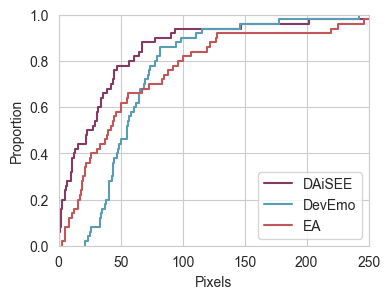

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# sns.histplot(all_po, element='step', fill=False, bins=np.arange(0, ), ax=ax)
# sns.histplot(all_ea, element='step', fill=False, ax=ax)
# ax.set(xlim=(0, 0.04))
sns.ecdfplot(data = all_indian, 
              
             stat='proportion', ax=ax, color= '#843b62')
sns.ecdfplot(data = all_po, 
                
             stat='proportion', ax=ax, color= '#599CB4')
sns.ecdfplot(data = all_ea, 
              
             stat='proportion', ax=ax, color= '#C25759')

ax.set(ylim=(0, 1))
ax.set(xlim=(0, 250))
ax.set_xlabel('Pixels')
ax.legend(['DAiSEE', 'DevEmo', 'EA'])
fig.savefig('../figure_panels/SHAP_CDF_all.svg', bbox_inches='tight', dpi=300)

In [27]:
np.median(all_po), np.median(all_ea), np.median(all_indian)

(55.0, 41.0, 25.5)

In [23]:
from scipy.stats import ks_2samp

In [24]:
ks_2samp(all_po, all_ea)

KstestResult(statistic=0.34, pvalue=0.005841778142694731, statistic_location=22, statistic_sign=-1)

In [25]:
ks_2samp(all_po, all_indian)

KstestResult(statistic=0.52, pvalue=1.5814255608393076e-06, statistic_location=32, statistic_sign=-1)

In [26]:
ks_2samp(all_ea, all_indian)

KstestResult(statistic=0.26, pvalue=0.06779471096995852, statistic_location=13, statistic_sign=-1)

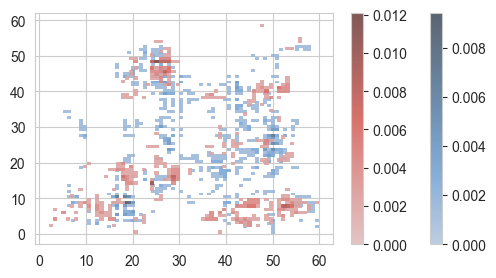

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.histplot(x=np.hstack(x_all_po), y=np.hstack(y_all_po), bins=64, ax=ax, color='#99BADF', alpha=0.9, stat='probability', cbar=True)
sns.histplot(x=np.hstack(x_all), y=np.hstack(y_all), bins=64, ax=ax, color='#DF9E9B', alpha=0.9,  stat='probability', cbar=True)
fig.savefig('SHAP_2Dhist.svg', bbox_inches='tight', dpi=300)

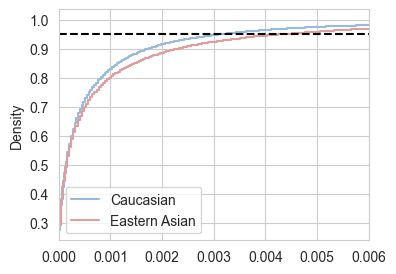

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.histplot(data = np.abs(values_polish[1].flatten()), 
                fill = False, cumulative=True, color='#99BADF',
             element='step', stat='density', ax=ax)
sns.histplot(data = np.abs(values_ea[1].flatten()), 
                fill = False, cumulative=True, color='#DF9E9B',
             element='step', stat='density', ax=ax)
ax.set_xlim(0, 0.006)
ax.legend(['Caucasian', 'Eastern Asian'])
ax.hlines(0.95, 0, 0.0061, ls='--', color='k')
fig.savefig('SHAP_cdf.svg', bbox_inches = 'tight', dpi=300)

<Axes: ylabel='Density'>

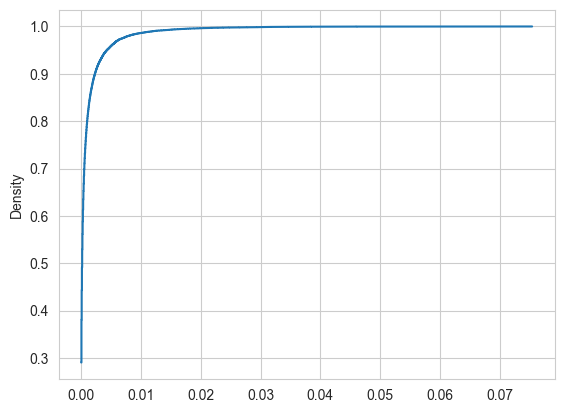

In [53]:
sns.histplot(data = np.abs(values_ea[1].flatten()), 
                fill = False, cumulative=True,
             element='step', stat='density')

(array([29199., 33878., 36159., 37430., 38228., 38782., 39206., 39518.,
        39747., 39953., 40092., 40197., 40296., 40379., 40454., 40529.,
        40587., 40634., 40677., 40706.]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
        0.008 , 0.0085, 0.009 , 0.0095, 0.01  ]),
 <BarContainer object of 20 artists>)

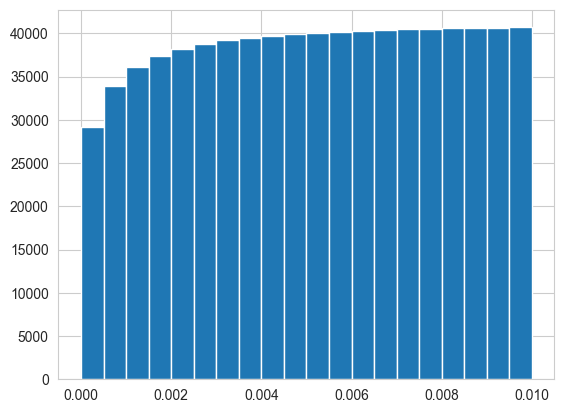

In [32]:
plt.hist(np.abs(values_polish[1].flatten()), range=(0, 0.010), bins=20, cumulative=True)

(array([28197., 32664., 34883., 36235., 37158., 37830., 38305., 38715.,
        39004., 39271., 39501., 39707., 39860., 39957., 40069., 40153.,
        40236., 40296., 40352., 40399.]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
        0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
        0.008 , 0.0085, 0.009 , 0.0095, 0.01  ]),
 <BarContainer object of 20 artists>)

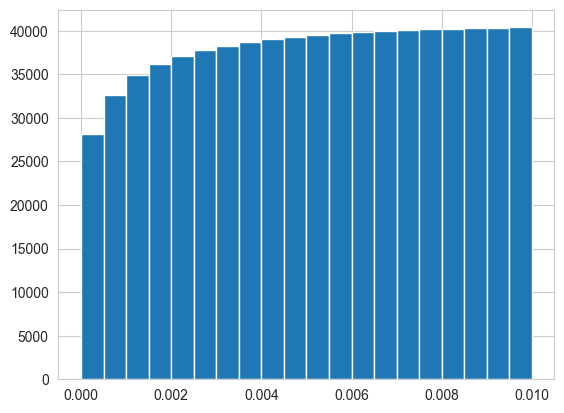

In [31]:
plt.hist(np.abs(values_ea[1].flatten()), range=(0, 0.01), bins=20, cumulative=True)